<a href="https://colab.research.google.com/github/Ramkumar496/Codsoft/blob/main/Movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import random as rnd

In [9]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

In [10]:
data = pd.read_csv("movies.csv", encoding= 'latin-1')

In [11]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
data = data.drop(['Name'], axis=1)

In [13]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [14]:
data.describe(include= 'all')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,102,182,485,NaN,2034,5938,4718,4891,4820
top,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [17]:
data.info

<bound method DataFrame.info of          Year Duration            Genre  Rating Votes            Director  \
0         NaN      NaN            Drama     NaN   NaN       J.S. Randhawa   
1      (2019)  109 min            Drama     7.0     8       Gaurav Bakshi   
2      (2021)   90 min   Drama, Musical     NaN   NaN  Soumyajit Majumdar   
3      (2019)  110 min  Comedy, Romance     4.4    35          Ovais Khan   
4      (2010)  105 min            Drama     NaN   NaN        Amol Palekar   
...       ...      ...              ...     ...   ...                 ...   
15504  (1988)      NaN           Action     4.6    11       Mahendra Shah   
15505  (1999)  129 min    Action, Drama     4.5   655          Kuku Kohli   
15506  (2005)      NaN           Action     NaN   NaN          Kiran Thej   
15507  (1988)      NaN           Action     NaN   NaN                 NaN   
15508  (1998)  130 min    Action, Drama     6.2    20        K.C. Bokadia   

                Actor 1             Actor 2

In [16]:
data.shape

(15509, 9)

In [18]:
data.nunique()

Year         102
Duration     182
Genre        485
Rating        84
Votes       2034
Director    5938
Actor 1     4718
Actor 2     4891
Actor 3     4820
dtype: int64

In [19]:
unique_years = data['Year'].unique()
print(unique_years)

[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(1917)' '(1913)' '(1930)' '(1926)' '(1914)' '(1924)']


In [20]:
data.isnull().sum()

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [21]:
data.dropna(subset=['Rating'], inplace = True)
data.isnull().sum()

Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [22]:
data.info

<bound method DataFrame.info of          Year Duration                      Genre  Rating  Votes  \
1      (2019)  109 min                      Drama     7.0      8   
3      (2019)  110 min            Comedy, Romance     4.4     35   
5      (1997)  147 min     Comedy, Drama, Musical     4.7    827   
6      (2005)  142 min        Drama, Romance, War     7.4  1,086   
8      (2012)   82 min  Horror, Mystery, Thriller     5.6    326   
...       ...      ...                        ...     ...    ...   
15501  (1992)      NaN       Action, Crime, Drama     5.3    135   
15503  (1989)  125 min       Action, Crime, Drama     5.8     44   
15504  (1988)      NaN                     Action     4.6     11   
15505  (1999)  129 min              Action, Drama     4.5    655   
15508  (1998)  130 min              Action, Drama     6.2     20   

                Director           Actor 1                 Actor 2  \
1          Gaurav Bakshi      Rasika Dugal          Vivek Ghamande   
3          

In [23]:
data['Duration'] = pd.to_numeric(data['Duration'].str.strip(' min'))
data['Duration'].fillna(data['Duration'].mean(), inplace = True)

In [24]:
data.info

<bound method DataFrame.info of          Year   Duration                      Genre  Rating  Votes  \
1      (2019)  109.00000                      Drama     7.0      8   
3      (2019)  110.00000            Comedy, Romance     4.4     35   
5      (1997)  147.00000     Comedy, Drama, Musical     4.7    827   
6      (2005)  142.00000        Drama, Romance, War     7.4  1,086   
8      (2012)   82.00000  Horror, Mystery, Thriller     5.6    326   
...       ...        ...                        ...     ...    ...   
15501  (1992)  132.29448       Action, Crime, Drama     5.3    135   
15503  (1989)  125.00000       Action, Crime, Drama     5.8     44   
15504  (1988)  132.29448                     Action     4.6     11   
15505  (1999)  129.00000              Action, Drama     4.5    655   
15508  (1998)  130.00000              Action, Drama     6.2     20   

                Director           Actor 1                 Actor 2  \
1          Gaurav Bakshi      Rasika Dugal          Vivek

In [25]:
data.isnull().sum()

Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

In [26]:
data.dropna(inplace=True)

In [27]:
data.shape

(7558, 9)

In [28]:
data.drop_duplicates(inplace = True)

In [29]:
data['Year'] = data['Year'].str.extract(r'(\d{4})', expand=False)

In [32]:
data.Year

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15501    1992
15503    1989
15504    1988
15505    1999
15508    1998
Name: Year, Length: 7558, dtype: object

In [33]:
data['Year'] = data['Year'].astype(int)
data.Year

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15501    1992
15503    1989
15504    1988
15505    1999
15508    1998
Name: Year, Length: 7558, dtype: int64

In [34]:
data.info

<bound method DataFrame.info of        Year   Duration                      Genre  Rating  Votes  \
1      2019  109.00000                      Drama     7.0      8   
3      2019  110.00000            Comedy, Romance     4.4     35   
5      1997  147.00000     Comedy, Drama, Musical     4.7    827   
6      2005  142.00000        Drama, Romance, War     7.4  1,086   
8      2012   82.00000  Horror, Mystery, Thriller     5.6    326   
...     ...        ...                        ...     ...    ...   
15501  1992  132.29448       Action, Crime, Drama     5.3    135   
15503  1989  125.00000       Action, Crime, Drama     5.8     44   
15504  1988  132.29448                     Action     4.6     11   
15505  1999  129.00000              Action, Drama     4.5    655   
15508  1998  130.00000              Action, Drama     6.2     20   

                Director           Actor 1                 Actor 2  \
1          Gaurav Bakshi      Rasika Dugal          Vivek Ghamande   
3          

In [35]:
data.Votes = data.Votes.str.replace(",","")
data['Votes'] = data['Votes'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int64  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int64  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 590.5+ KB


In [36]:
data.describe(include='all')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,7558.000000,7558.000000,7558,7558.000000,7558.000000,7558,7558,7558,7558
unique,NaN,NaN,416,NaN,NaN,2956,2415,2783,3031
top,NaN,NaN,Drama,NaN,NaN,Mahesh Bhatt,Jeetendra,Rekha,Pran
freq,NaN,NaN,1137,NaN,NaN,45,140,79,74
mean,1993.421011,133.151524,NaN,5.811127,2029.123842,NaN,NaN,NaN,NaN
std,20.004711,21.914467,NaN,1.368255,11868.695754,NaN,NaN,NaN,NaN
min,1917.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,1980.000000,125.000000,NaN,4.900000,18.000000,NaN,NaN,NaN,NaN
50%,1996.000000,132.294480,NaN,6.000000,61.000000,NaN,NaN,NaN,NaN
75%,2011.000000,144.000000,NaN,6.800000,456.000000,NaN,NaN,NaN,NaN


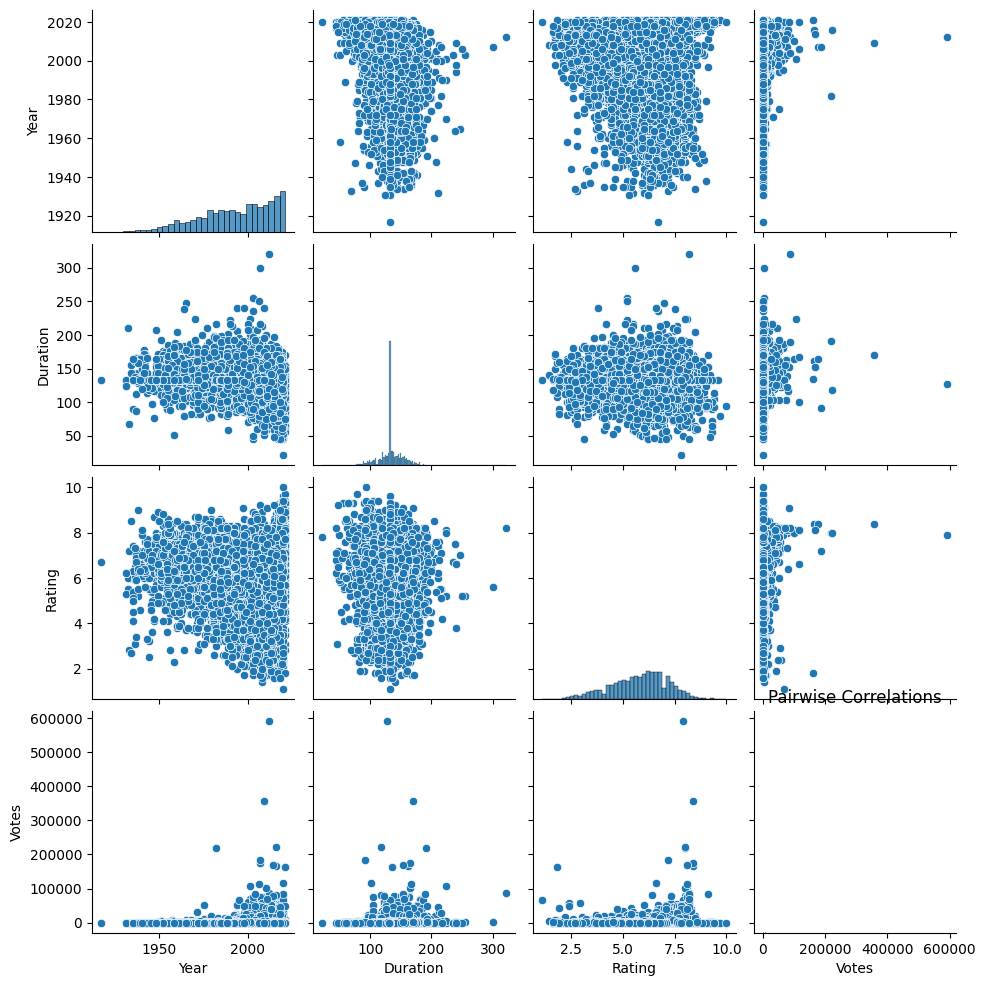

In [37]:
sns.pairplot(data)
plt.title('Pairwise Correlations')
plt.show()

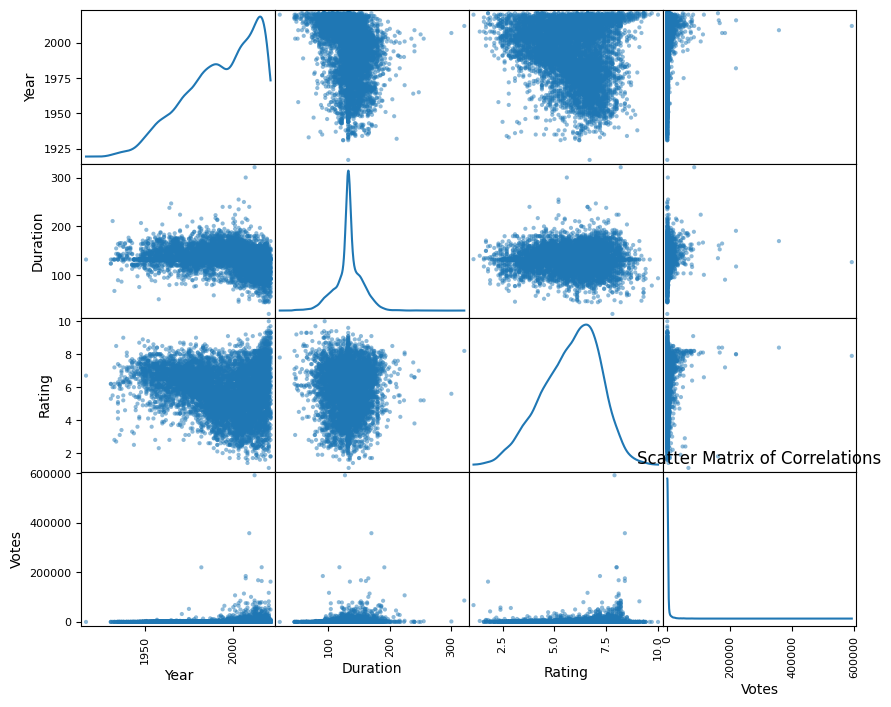

In [38]:
pd.plotting.scatter_matrix(data, figsize=(10, 8), diagonal='kde')
plt.title('Scatter Matrix of Correlations')
plt.show()

<ipython-input-39-9fe765d4f8ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Duration'])


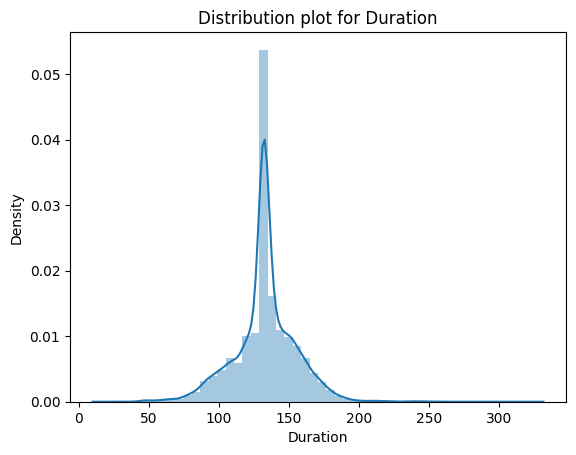

In [39]:
sns.distplot(data['Duration'])
plt.title('Distribution plot for Duration')
plt.show()

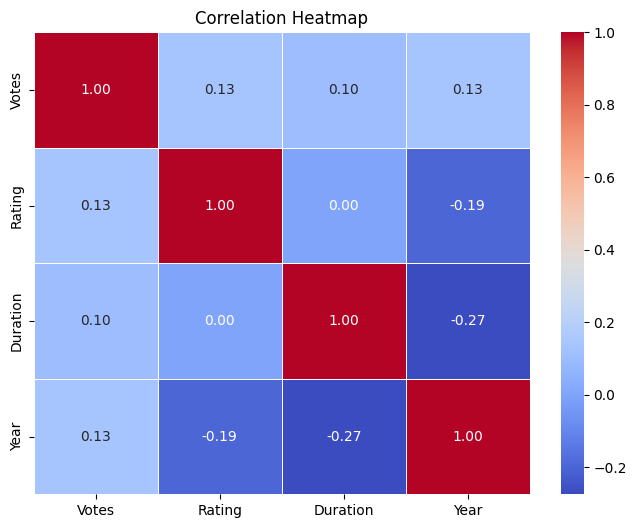

In [40]:
correlation_matrix = data[['Votes', 'Rating', 'Duration','Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-41-52a4e3bd1aab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Votes'])


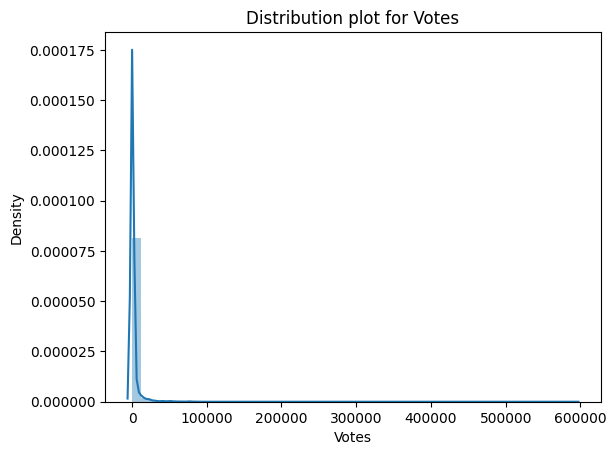

In [41]:
sns.distplot(data['Votes'])
plt.title('Distribution plot for Votes')
plt.show()

In [42]:
data[data['Votes']>100000]

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,2016,161.0,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
3829,2020,101.0,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
4848,1982,191.0,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8035,2001,224.0,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8219,2012,127.0,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8228,2007,165.0,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
8233,2016,118.0,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
9764,2010,165.0,Drama,8.0,101014,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
10882,2014,153.0,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


In [43]:
data[data['Rating']>9]

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1314,2018,97.00000,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1729,2021,72.00000,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
2563,2020,132.29448,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
4278,1997,132.29448,Action,9.1,44,Mukul Anand,Rahul Dev,Sanjay Dutt,Salman Khan
5077,2019,105.00000,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
5125,2019,90.00000,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
5410,2021,79.00000,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6025,2007,140.00000,Action,9.2,36,Tom Alter,Bobby Darling,Anil Dhawan,Kiran Juneja
6852,2021,93.00000,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
6952,2021,170.00000,"Action, Drama, Fantasy",9.1,2219,Prabu Solomon,Raghu Babu,Rana Daggubati,Abudhar Al Hassan


<ipython-input-44-bcb02354f27f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes', y='Actor 1', data=actor_votes, palette='viridis')


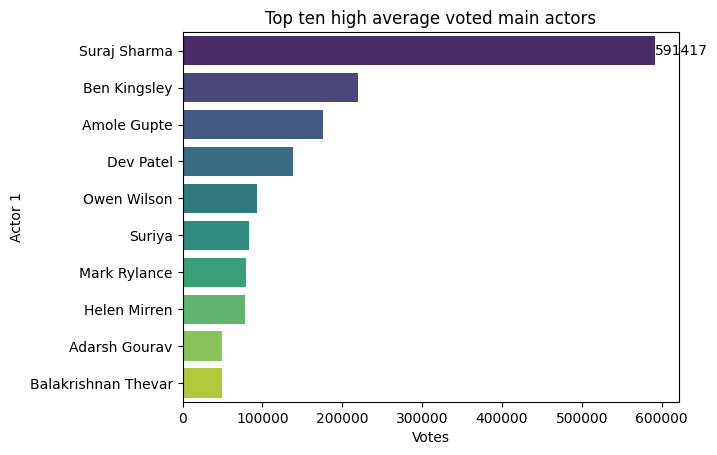

In [44]:
actor_votes = (data.groupby('Actor 1')['Votes'].mean()
                .sort_values(ascending=False)
                .head(10)
                .reset_index())
sns.barplot(x='Votes', y='Actor 1', data=actor_votes, palette='viridis')
plt.bar_label(plt.gca().containers[0])
plt.title('Top ten high average voted main actors')
plt.show()

<ipython-input-45-b734874889d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Actor 1', data=actor_rate, palette='viridis')


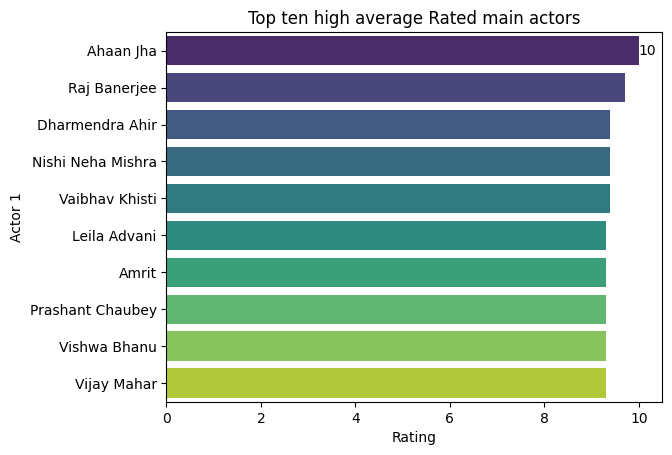

In [45]:
actor_rate = (data.groupby('Actor 1')['Rating'].mean()
                .sort_values(ascending=False)
                .head(10)
                .reset_index())
sns.barplot(x='Rating', y='Actor 1', data=actor_rate, palette='viridis')
plt.bar_label(plt.gca().containers[0])
plt.title('Top ten high average Rated main actors')
plt.show()

<ipython-input-46-24828ba36c33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Genre', data=genre_rate, palette='viridis')


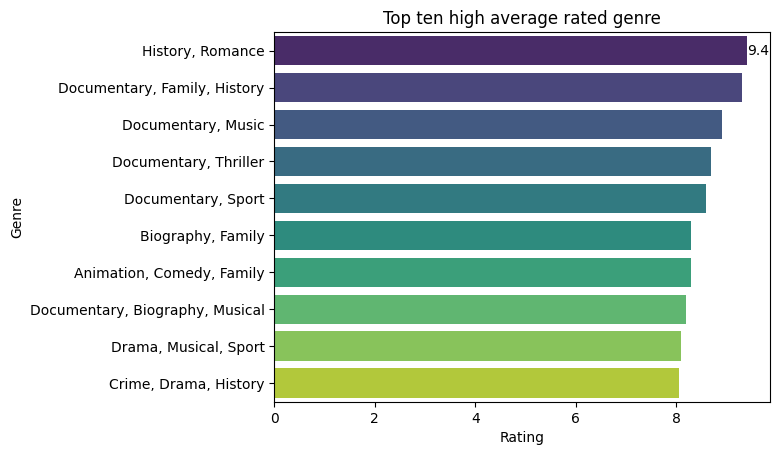

In [46]:
genre_rate = (data.groupby('Genre')['Rating'].mean()
                .sort_values(ascending=False)
                .head(10)
                .reset_index())
sns.barplot(x='Rating', y='Genre', data=genre_rate, palette='viridis')
plt.bar_label(plt.gca().containers[0])
plt.title('Top ten high average rated genre')
plt.show()

<ipython-input-47-ed9684af50f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Director', data=dir_rate, palette='viridis')


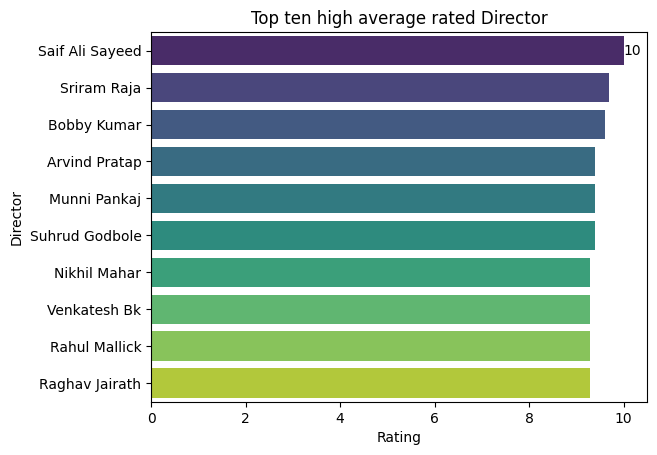

In [47]:
dir_rate = (data.groupby('Director')['Rating'].mean()
                .sort_values(ascending=False)
                .head(10)
                .reset_index())
sns.barplot(x='Rating', y='Director', data=dir_rate, palette='viridis')
plt.bar_label(plt.gca().containers[0])
plt.title('Top ten high average rated Director')
plt.show()

In [48]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating


In [49]:
data['Director_encoded'] = data.groupby('Director')['Rating'].transform('mean')
data['Actor_encoded'] = data.groupby('Actor 1')['Rating'].transform('mean')
x = data[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']]
y = data['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [51]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor_encoded
1,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.345910,7.000000,6.850000
3,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.700000,4.400000,5.420000
5,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.224490,5.358824,4.788889
6,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.500000,5.300000
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.463636,5.600000,5.600000


In [52]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
table = [["Mean Squared Error", mse],
         ["Mean Absolute Error", mae],
         ["R2 Score", r2]]
print(tabulate(table, headers=["Metric", "Value"], tablefmt="pretty"))

+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
| Mean Squared Error  | 0.5501799962126869 |
| Mean Absolute Error | 0.5466015139996061 |
|      R2 Score       | 0.7030608301311393 |
+---------------------+--------------------+


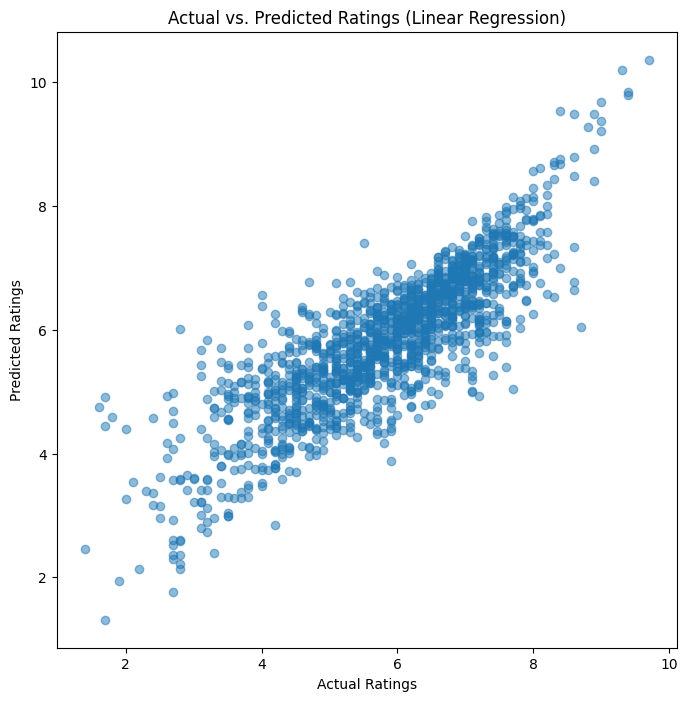

In [53]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings (Linear Regression)")
plt.show()